In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2,linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c =torch.tensor(t_c).unsqueeze(1)#在后面加一维，变成11，1。 11是batch size ,1是每次输入
t_u = torch.tensor(t_u).unsqueeze(1)

t_c,t_c.shape

(tensor([[ 0.5000],
         [14.0000],
         [15.0000],
         [28.0000],
         [11.0000],
         [ 8.0000],
         [ 3.0000],
         [-4.0000],
         [ 6.0000],
         [13.0000],
         [21.0000]]),
 torch.Size([11, 1]))

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices =shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
val_t_u = t_u[val_indices]
train_t_c = t_c[train_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1*train_t_u
val_t_un = 0.1*val_t_u

train_t_un,train_t_un.shape,val_t_un.shape

(tensor([[5.5900],
         [8.1900],
         [4.8400],
         [6.8400],
         [2.1800],
         [5.8200],
         [5.6300],
         [3.3900],
         [3.5700]]),
 torch.Size([9, 1]),
 torch.Size([2, 1]))

In [4]:
import torch.nn as nn
linear_model = nn.Linear(1,1)#
linear_model(val_t_un),val_t_un.shape

(tensor([[1.2896],
         [1.0903]], grad_fn=<AddmmBackward0>),
 torch.Size([2, 1]))

Linear layers
class torch.nn.Linear(in_features, out_features, bias=True)
对输入数据做线性变换：y=Ax+b
参数：

in_features - 每个输入样本的大小
out_features - 每个输出样本的大小
bias - 若设置为False，这层不会学习偏置。默认值：True
形状：

输入: (N,in_features)
输出： (N,out_features)
变量：

weight -形状为(out_features x in_features)的模块中可学习的权值
bias -形状为(out_features)的模块中可学习的偏置


In [5]:
a = torch.tensor([0.1,0.2])
a.ndim,a,val_t_un.ndim

(1, tensor([0.1000, 0.2000]), 2)

In [6]:
linear_model.weight,linear_model.weight.shape

(Parameter containing:
 tensor([[0.1733]], requires_grad=True),
 torch.Size([1, 1]))

In [7]:
linear_model.bias,linear_model.bias.shape

(Parameter containing:
 tensor([0.2430], requires_grad=True),
 torch.Size([1]))

In [9]:
x = torch.ones(1)
linear_model(x),x.shape

(tensor([0.4162], grad_fn=<AddBackward0>), torch.Size([1]))

In [10]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x7f94591bf0b0>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5806]], requires_grad=True),
 Parameter containing:
 tensor([-0.9418], requires_grad=True)]

In [13]:
def loss_fn(t_p,t_c):
    squared_diff = (t_p-t_c)**2
    return squared_diff.mean()

In [14]:
def training_loop(n_epochs,optimizer,model,loss_fn,t_u_train,t_u_val,t_c_train,t_c_val):
    for epoch in range(1,n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train,t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val,t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch{epoch}, Training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")


In [15]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

In [16]:
training_loop(n_epochs=3000,
              optimizer=optimizer,
              model=linear_model,
              loss_fn=loss_fn,
              t_u_train=train_t_un,
              t_u_val= val_t_un,
              t_c_train=train_t_c,
              t_c_val=val_t_c)

Epoch1, Training loss 99.1030,Validation loss 35.6019
Epoch1000, Training loss 3.3806,Validation loss 4.0849
Epoch2000, Training loss 2.8630,Validation loss 3.9756
Epoch3000, Training loss 2.8541,Validation loss 3.9680


In [17]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.4242]], requires_grad=True)
Parameter containing:
tensor([-17.2501], requires_grad=True)


In [18]:
training_loop(n_epochs=3000,
              optimizer=optimizer,
              model=linear_model,
              loss_fn=nn.MSELoss(),
              t_u_train=train_t_un,
              t_u_val=val_t_un,
              t_c_train=train_t_c,
              t_c_val=val_t_c)

Epoch1, Training loss 2.8541,Validation loss 3.9680
Epoch1000, Training loss 2.8539,Validation loss 3.9671
Epoch2000, Training loss 2.8539,Validation loss 3.9670
Epoch3000, Training loss 2.8539,Validation loss 3.9670


In [19]:
seq_model = nn.Sequential(nn.Linear(1,13),
                          nn.Tanh(),
                          nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [20]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [21]:
from collections import OrderedDict #用来给网络层命名

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear',nn.Linear(1,8)),
    ('hidden_activation',nn.Tanh()),
    ('output_linear',nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [23]:
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train= train_t_un,
    t_u_val= val_t_un,
    t_c_train=train_t_c,
    t_c_val=val_t_c
)

print('output',seq_model(val_t_un))
print('answer',val_t_c)
print('hidden',seq_model.hidden_linear.weight.grad)

Epoch1, Training loss 1.7783,Validation loss 5.6918
Epoch1000, Training loss 1.6935,Validation loss 2.6517
Epoch2000, Training loss 1.6647,Validation loss 2.7704
Epoch3000, Training loss 1.6275,Validation loss 2.9453
Epoch4000, Training loss 1.5835,Validation loss 3.1670
Epoch5000, Training loss 1.5398,Validation loss 3.4241
output tensor([[16.1097],
        [ 7.5676]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [ 8.]])
hidden tensor([[-1.7517e-01],
        [-8.3813e+00],
        [-7.3011e-02],
        [-1.4216e+00],
        [ 6.3167e+00],
        [ 1.4242e-03],
        [-6.3938e+00],
        [-1.4577e-01]])


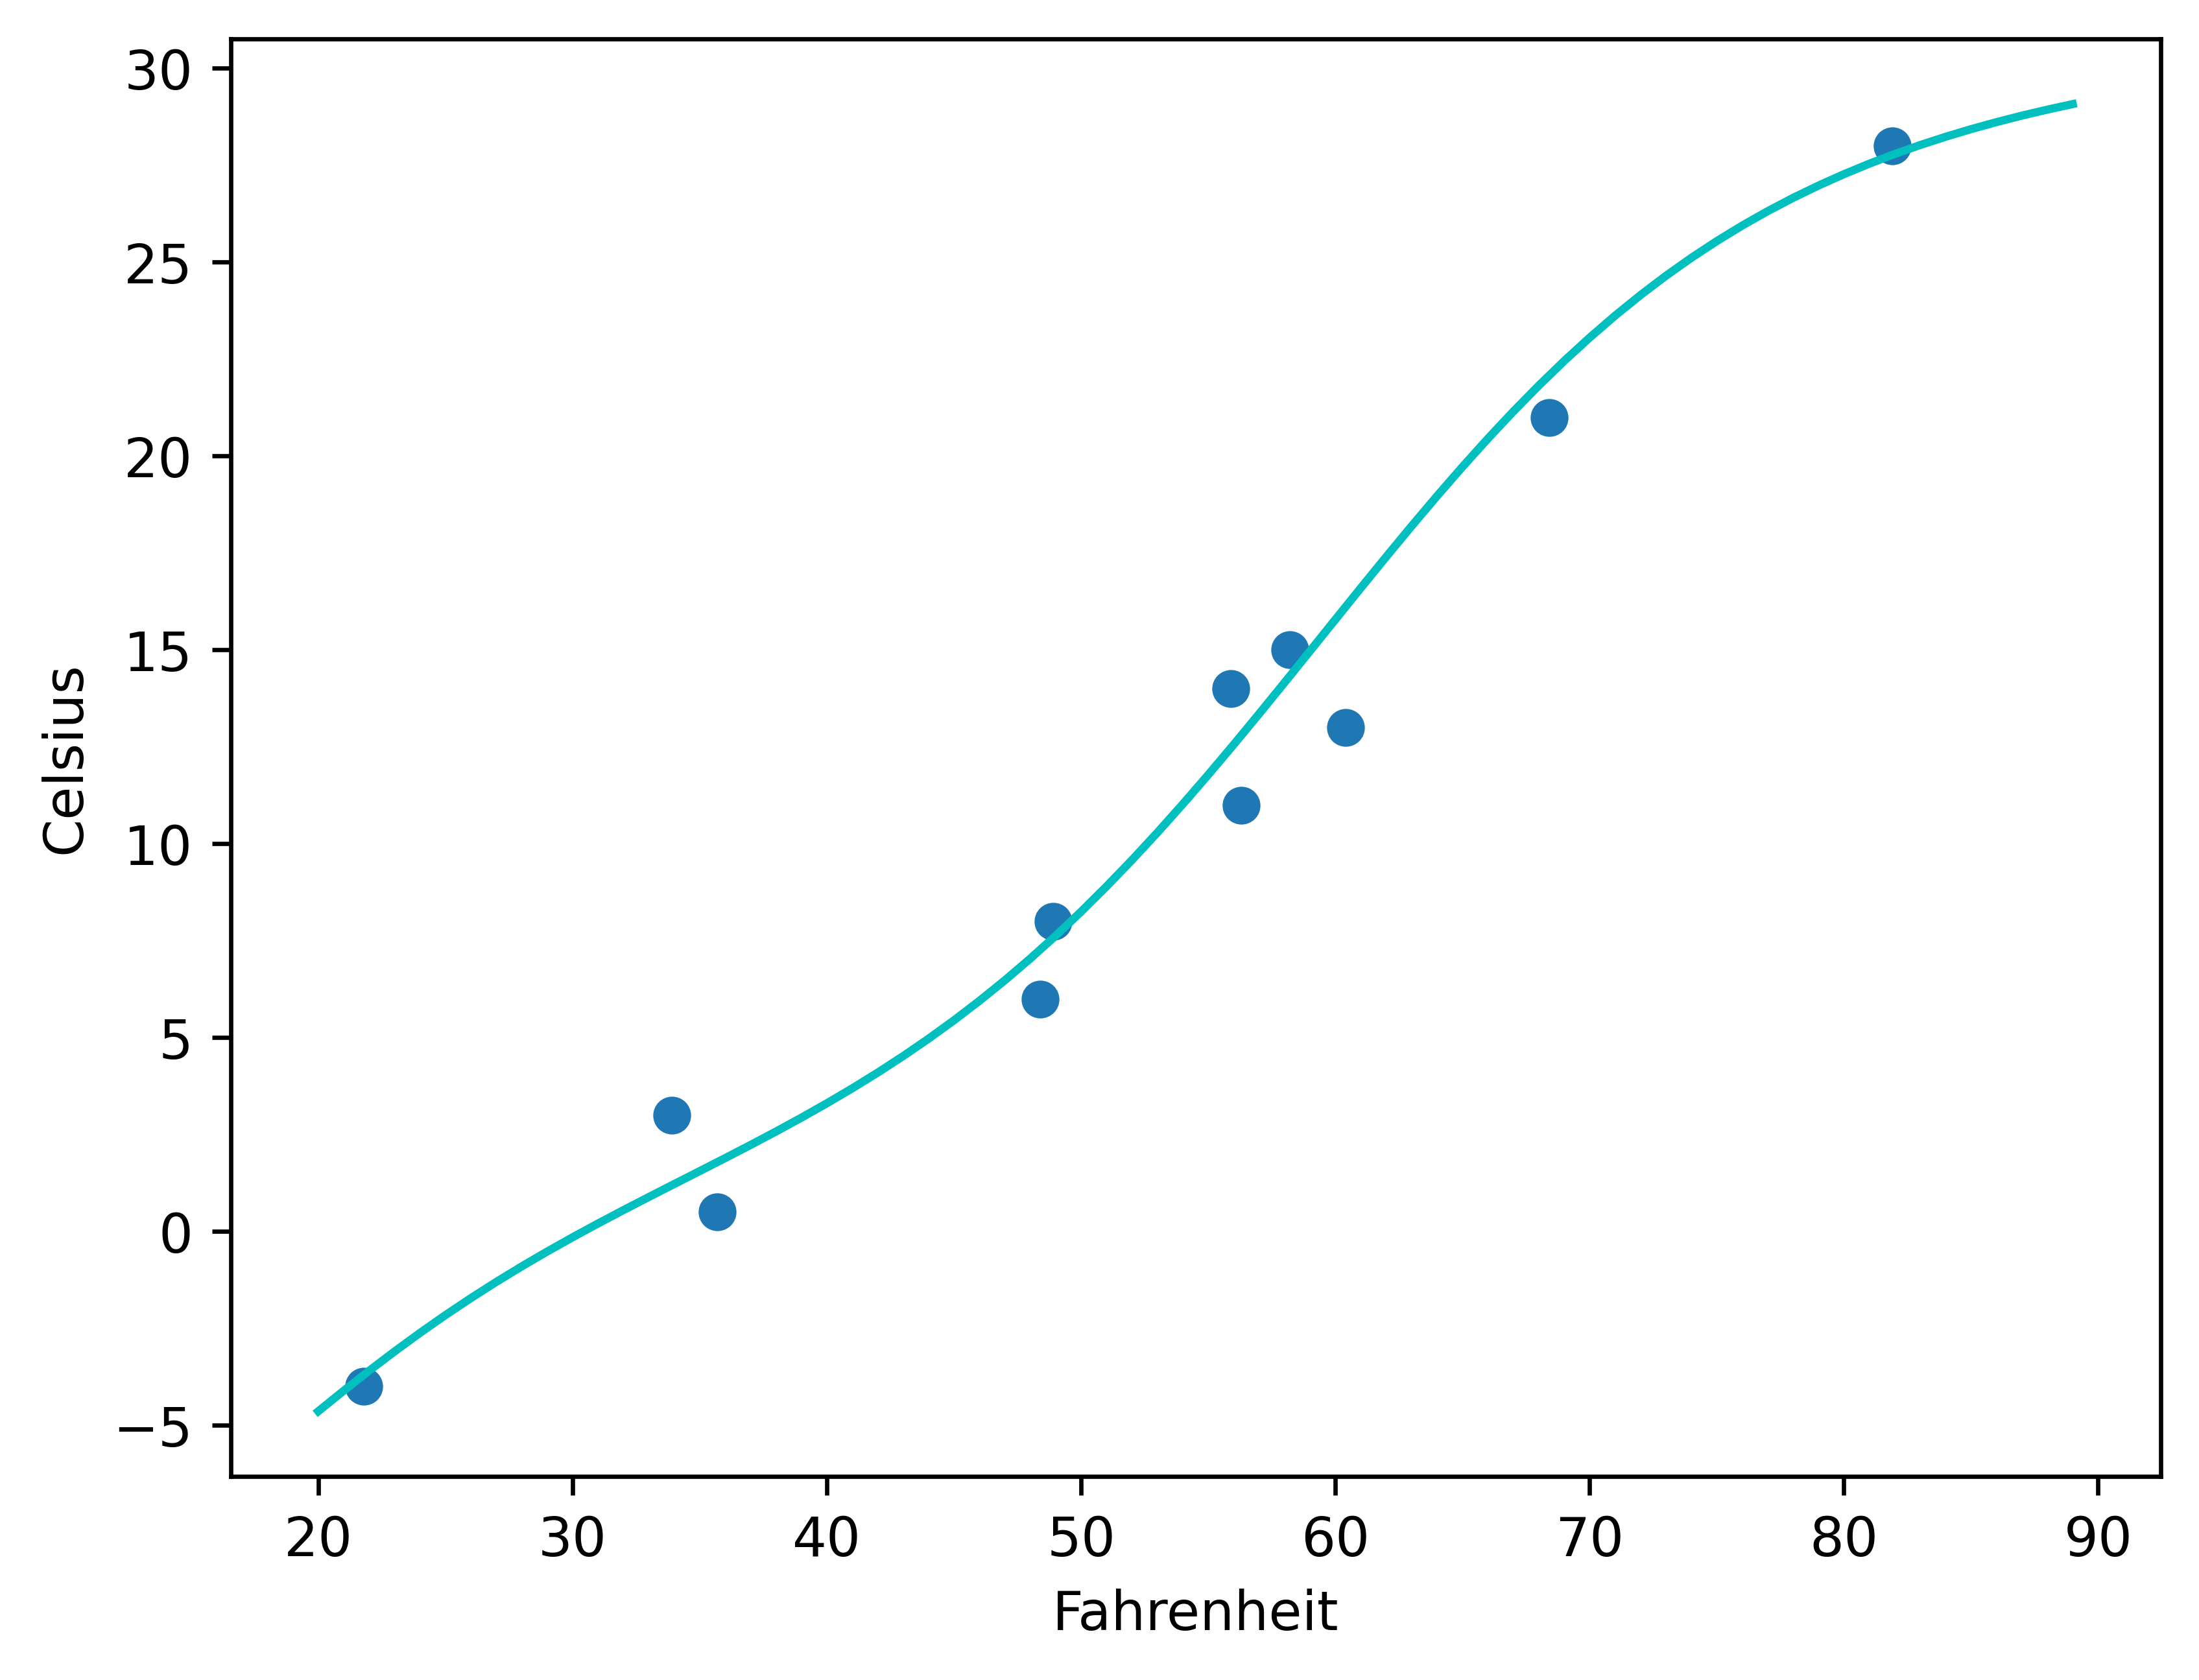

In [24]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.,90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel('Fahrenheit')
plt.ylabel("Celsius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seq_model(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),seq_model(0.1*t_u).detach().numpy(),'kx')